In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("placement.csv")

In [3]:
df

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0
...,...,...,...,...
95,95,4.3,200.0,0
96,96,4.4,42.0,0
97,97,6.7,182.0,1
98,98,6.3,103.0,1


#steps
'''1.Preprocess +EDA + Feature Selection
2.Extract input and output columns
3.Scale the values
4.Train Test split
5.Train the model
5.Evaluate the model/model selection
6.Deploy the model'''

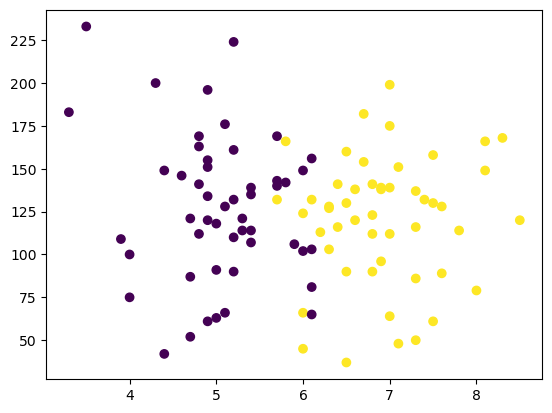

In [4]:
plt.scatter(df['cgpa'],df['iq'],c=df['placement'])

In [5]:
x=df.iloc[:,0:2]
y=df.iloc[:,-1]

In [6]:
x,y

(    Unnamed: 0  cgpa
 0            0   6.8
 1            1   5.9
 2            2   5.3
 3            3   7.4
 4            4   5.8
 ..         ...   ...
 95          95   4.3
 96          96   4.4
 97          97   6.7
 98          98   6.3
 99          99   6.2
 
 [100 rows x 2 columns],
 0     1
 1     0
 2     0
 3     1
 4     0
      ..
 95    0
 96    0
 97    1
 98    1
 99    1
 Name: placement, Length: 100, dtype: int64)

In [7]:
x.shape

(100, 2)

In [8]:
y.shape

(100,)

In [9]:
from sklearn.model_selection import train_test_split
x_train,X_test,y_train,y_test=train_test_split(x,y,test_size=.1)

In [10]:
x_train

,Unnamed: 0,cgpa
94,94,4.7
27,27,6.0
76,76,4.9
52,52,7.0
65,65,8.1
...,...,...
22,22,4.9
73,73,4.9
1,1,5.9
3,3,7.4


In [11]:
X_test

,Unnamed: 0,cgpa
11,11,6.9
28,28,5.2
39,39,4.6
64,64,7.0
17,17,3.3
96,96,4.4
84,84,5.7
86,86,5.1
24,24,4.7
72,72,7.3


In [12]:
y_train

94    0
27    1
76    0
52    1
65    1
     ..
22    0
73    0
1     0
3     1
14    0
Name: placement, Length: 90, dtype: int64

In [13]:
y_test

11    1
28    0
39    0
64    1
17    0
96    0
84    0
86    0
24    0
72    1
Name: placement, dtype: int64

In [14]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_train
X_test=scaler.transform(X_test)
X_test

array([[-1.33119211,  0.76246955],
       [-0.73894904, -0.770485  ],
       [-0.35573293, -1.31152778],
       [ 0.51521276,  0.85264335],
       [-1.12216514, -2.48378715],
       [ 1.63002325, -1.49187538],
       [ 1.21196932, -0.31961601],
       [ 1.28164497, -0.8606588 ],
       [-0.87830035, -1.22135399],
       [ 0.79391539,  1.12316474]])

In [15]:
from sklearn.linear_model import LogisticRegression

In [16]:
clf=LogisticRegression()

In [17]:
clf.fit(x_train,y_train)

LogisticRegression()

In [18]:
y_pred=clf.predict(X_test)
y_pred

array([1, 0, 0, 1, 0, 0, 0, 0, 0, 1])

In [19]:
y_test

11    1
28    0
39    0
64    1
17    0
96    0
84    0
86    0
24    0
72    1
Name: placement, dtype: int64

In [20]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

1.0

In [21]:
accuracy_score(y_pred,y_test)

1.0

In [22]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

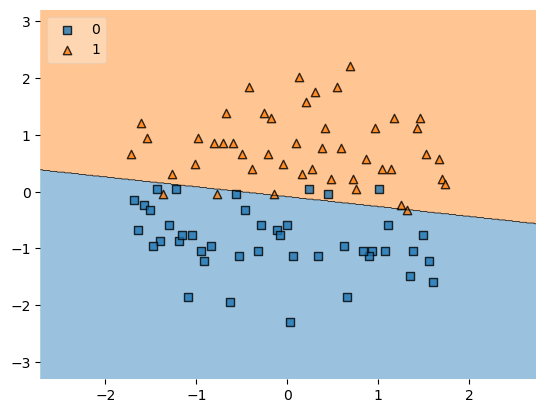

In [23]:
plot_decision_regions(x_train,y_train.values,clf=clf,legend=2)

In [24]:
import pickle


In [28]:
pickle.dump(clf,open('PlacementModel.pkl','wb'))